## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [61]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Import the 'Boston' datatset (house price in Boston)

#### Split the raw data into features(df) and target

In [57]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#features in df
df = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]))
target = pd.DataFrame(raw_df.values[1::2, 2])

Variables in order:  
 CRIM : per capita crime rate by town  
 ZN : proportion of residential land zoned for lots over 25,000 sq.ft.  
 INDUS    :proportion of non-retail business acres per town  
 CHAS     :Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)  
 NOX      :nitric oxides concentration (parts per 10 million)  
 RM       :average number of rooms per dwelling  
 AGE      :proportion of owner-occupied units built prior to 1940  
 DIS      :weighted distances to five Boston employment centres  
 RAD      :index of accessibility to radial highways  
 TAX      :full-value property-tax rate per $10,000  
 PTRATIO  :pupil-teacher ratio by town  
 B        :1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town  
 LSTAT    :% lower status of the population  
 MEDV     :Median value of owner-occupied homes in $1000's  


 MEDV is target

#### Set the column name

In [58]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']

target.columns = ['MEDV']

In [59]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [52]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### Build a model to predict the house price(MEDV)

1. for simplification, I use 'CRIM' only
2. By definition, 'CRIM' is numerical, so I am going to build a Linear Regression model

In [64]:
crim = df[['CRIM']]
crim.shape

(506, 1)

In [68]:
# separate the data into train and test
x_train, x_test, y_train, y_test = train_test_split(crim, target, test_size = 0.2, random_state=6)

# new a Linear Regression model
regr = linear_model.LinearRegression()

# train the model with training data
regr.fit(x_train, y_train)

LinearRegression()

In [69]:
# test the predicition with testing data
y_pred = regr.predict(x_test)

check the parameter

In [77]:
print('Coefficients: ', regr.coef_)

Coefficients:  [[-0.45237872]]


**The negative value indicates that higher crime rate, lower house price**

evaluation the model performance

In [76]:
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))

Mean squared error: 78.87


visulize the distribution of real data and model

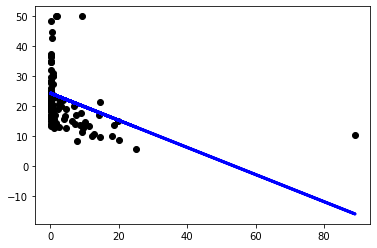

In [75]:
# scatter of real data
plt.scatter(x_test, y_test, color = 'black')
# line of linear model
plt.plot(x_test, y_pred, color = 'blue', linewidth=3)
plt.show()